In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
import numpy as np 

In [3]:
path="/kaggle/input/graduates-admission-prediction/"
data_file="admission_data.csv"
data=pd.read_csv(path+data_file)

In [4]:
data.shape

(500, 8)

In [5]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((400, 7), (100, 7), (400,), (100,))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
train_x_scale=scale.fit_transform(train_x)
test_x_scale=scale.fit_transform(test_x)

In [11]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense 

In [12]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='mean_squared_error',optimizer='Adam')
hist=model.fit(train_x_scale,train_y,epochs=15,validation_split=0.2)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9492 - val_loss: 1.5651
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7452 - val_loss: 1.3613
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5647 - val_loss: 1.1845
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2817 - val_loss: 1.0328
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1373 - val_loss: 0.8992
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0029 - val_loss: 0.7823
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8620 - val_loss: 0.6751
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7315 - val_loss: 0.5485
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5700 - val_loss: 0.3819
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3931 - val_loss: 0.2311
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2345 - val_loss: 0.1232
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1330 - val_l

In [15]:
y_pred=model.predict(test_x_scale)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [16]:
from sklearn.metrics import r2_score 
r2_score(test_y,y_pred)

0.21051186188166393

In [17]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='mean_squared_error',optimizer='Adam')
hist=model.fit(train_x_scale,train_y,epochs=30,validation_split=0.2)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.3614 - val_loss: 1.0821
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1215 - val_loss: 0.8883
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9435 - val_loss: 0.7379
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7933 - val_loss: 0.6329
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6690 - val_loss: 0.5355
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5553 - val_loss: 0.4175
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4168 - val_loss: 0.3033
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3069 - val_loss: 0.2090
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2075 - val_loss: 0.1410
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1312 - val_loss: 0.0953
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1052 - val_loss: 0.0665
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0598 - val_l

In [20]:
y_pred=model.predict(test_x_scale)
r2_score(test_y,y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


0.480983512047224

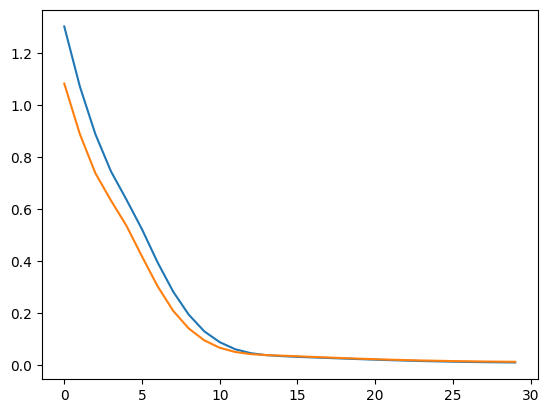

In [21]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()